## ПРОЕКТ: МОДЕЛЬ ДЛЯ ЗОЛОТОДОБЫВАЮЩЕЙ ОТРАСЛИ

**ОПИСАНИЕ ПРОЕКТА**

Предмет исследования - реальная задача Data Science из золотодобывающей отрасли.\
Проект предоставлен компанией "Цифра".\
Данные находятся в 3-х файлах.\
Это сырые данные с параметрами добычи и очистки.

**ЗАДАЧА ИССЛЕДОВАНИЯ**

Подготовка прототипа модели машинного обучения для "Цифры".\
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.\
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**ПЛАН ИССЛЕДОВАНИЯ**

1. [Подготовка данных](#1)
2. [Анализ данных](#2)
3. [Построение моделей](#3)
4. [Вывод](#4)

<a id='1'></a>
# Подготовка данных

## Получение данных из файлов, запись в датафреймы и изучение

In [3]:
!pip install jupyter_black -q

In [4]:
!pip install -Uq scikit-learn

Импортируем необходимые библиотеки

In [5]:
# импорт pandas и необходимых библиотек
import jupyter_black
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os
import pandas as pd
import seaborn as sns
import warnings

from joblib import dump, load
from scipy import stats
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

warnings.filterwarnings("ignore")

jupyter_black.load()

Откроем файлы, прочтем и запишем в переменные.

In [6]:
# объявление переменных
train_file = "dataset_train.csv"
test_file = "dataset_test.csv"
full_file = "dataset_full.csv"
user_path = "..."
general_path = "..."


# функция для чтения файлов
def get_read_file(general_path, user_path, file):
    path1 = os.path.join(general_path, file)
    path2 = os.path.join(user_path, file)

    if os.path.exists(os.path.join(path1)):
        return pd.read_csv(path1, sep=",")
    elif os.path.exists(os.path.join(path2)):
        return pd.read_csv(path2, sep=",")
    else:
        print("Путь к файлу не найден!")


# чтение csv-файла в датафрейм с сохранением в переменную train_df
train_df = get_read_file(general_path, user_path, train_file)
# чтение csv-файла в датафрейм с сохранением в переменную test_df
test_df = get_read_file(general_path, user_path, test_file)
# чтение csv-файла в датафрейм с сохранением в переменную full_df
full_df = get_read_file(general_path, user_path, full_file)
# сохранение количества строк в переменную
train_rows_before = train_df.shape[0]
test_rows_before = test_df.shape[0]
full_rows_before = full_df.shape[0]

Изучим общую информацию о полученных датафреймах

In [7]:
# вывод первых 5-ти строчек датафреймов
print("train_df")
display(train_df.head(5))
print("")
print("test_df")
display(test_df.head(5))
print("")
print("full_df")
full_df.head(5)

train_df


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



test_df


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



full_df


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
# вывод основной информации о датафреймах
print("train_df")
display(train_df.info())
print("")
print("test_df")
display(test_df.info())
print("")
print("full_df")
full_df.info()

train_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null 

None


test_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  pri

None


full_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null 

In [9]:
# вывод количества пропущенных значений для каждого столбца датафреймов
print("train_df")
display(train_df.isna().sum().sort_values(ascending=False))
print("")
print("test_df")
display(test_df.isna().sum().sort_values(ascending=False))
print("")
print("full_df")
full_df.isna().sum().sort_values(ascending=False)

train_df


secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.output.concentrate_pb                  0
rougher.output.concentrate_au                  0
rougher.output.recovery                        0
rougher.output.tail_pb                         0
date                                           0
Length: 87, dtype: int64


test_df


rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank2_a_level     0
date                                           0
rougher.state.floatbank10_e_air                0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.st


full_df


secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_d_air                0
rougher.output.tail_pb                         0
rougher.output.tail_sol                        0
date                                           0
Length: 87, dtype: int64

***

**ВЫВОД:**
1. Исходный датасет ***full_df*** содержит обучающую ***train_df*** и тестовую ***test_df*** выборки со всеми признаками.
2. В датафрейме ***test_df*** отсутствуют некоторые признаки.
3. В датафрейме ***test_df*** 53 столбца, а в ***train_df*** и в ***full_df*** - 87 столбцов.
4. Данные индексируются датой и временем получения информации (признак *date*).
5. Во всех датафреймах есть пропущенные значения.

## Вычисление эффективности обогащения

Вычислим эффективность обогащения на датафрейме ***train_df*** для признака `'rougher.output.recovery'`

In [10]:
# вычисление по формуле
train_df["test.rougher.output.recovery"] = (
    train_df["rougher.output.concentrate_au"]
    * (train_df["rougher.input.feed_au"] - train_df["rougher.output.tail_au"])
    / (
        train_df["rougher.input.feed_au"]
        * (
            train_df["rougher.output.concentrate_au"]
            - train_df["rougher.output.tail_au"]
        )
    )
    * 100
)

Найдем MAE между расчетным значением признака '`rougher.output.recovery`' и значением из таблицы

In [11]:
# рассчет MAE
mean_absolute_error(
    train_df["rougher.output.recovery"], train_df["test.rougher.output.recovery"]
)

9.73512347450521e-15

***

***ВЫВОД:***
1. Так как значение MAE очень мало, можно утверждать, что в ***train_df*** эффективность обогащения для признака `'rougher.output.recovery'` указана верно.

## Анализ признаков, недоступных в тестовой выборке

Выведем список признаков, недоступных в тестовой выборке

In [12]:
# создание списков столбцов по датафреймам
train_lst = train_df.columns.tolist()
test_lst = test_df.columns.tolist()
# создание списка различий
result_lst = [x for x in train_lst if x not in test_lst]
# вывод списка
print(*result_lst, sep="\n")

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

***

***ВЫВОД:***
1. Признаки, недоступные в тестовой выборке, относятся к выходным и расчетным данным, недоступным до начала производства.

## Предобработка данных

Так как в описании проекта указано, что соседние по времени параметры часто похожи, можно заполнить пропущенные значения предыдущими.

В датафрейме ***test_df*** заполним пропущенные значения предыдущими

In [13]:
# объявление списка столбцов с пропусками
test_null_lst = (
    test_df.isna()
    .sum()
    .reset_index()
    .rename(columns={0: "sum"})
    .query("sum != 0")["index"]
    .tolist()
)
# заполнение пропусков в цикле
for column in test_null_lst:
    test_df[column] = test_df[column].fillna(method="ffill")

Проверим заполнение пропусков

In [14]:
# проверка заполнения пропусков
test_df.isna().sum()[test_df.isna().sum() != 0]

Series([], dtype: int64)

В датафрейме ***train_df*** заполним пропущенные значения предыдущими

In [15]:
# объявление списка столбцов с пропусками
train_null_lst = (
    train_df.isna()
    .sum()
    .reset_index()
    .rename(columns={0: "sum"})
    .query("sum != 0")["index"]
    .tolist()
)
# заполнение пропусков в цикле
for column in train_null_lst:
    train_df[column] = train_df[column].fillna(method="ffill")

Проверим заполнение пропусков

In [16]:
# проверка заполнения пропусков
train_df.isna().sum()[train_df.isna().sum() != 0]

Series([], dtype: int64)

***

***ВЫВОД:***
1. В датафреймах ***train_df*** и ***test_df*** были заполнены пропуски предыдущими значениями

***

## ОБЩИЙ ВЫВОД ПО ПОДГОТОВКЕ ДАННЫХ
1. Исходный датасет ***full_df*** содержит обучающую ***train_df*** и тестовую ***test_df*** выборки со всеми признаками.
2. В датафрейме ***test_df*** 53 столбца, а в ***train_df*** и в ***full_df*** - 87 столбцов.
3. Признаки, недоступные в тестовой выборке, относятся к выходным и расчетным данным, недоступным до начала производства.
4. В датафреймах ***train_df*** и ***test_df*** были заполнены пропуски предыдущими значениями

<a id='2'></a>
# Анализ данных

## Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

На данных датафрейма ***full_df*** посмотрим на изменения концентрации металлов:
- серебра
- свинца
- золота

на разных этапах очистки

### Анализ изменений концентрации серебра

Построим гистограмму для анализа распределения частоты различных концентраций металлов.

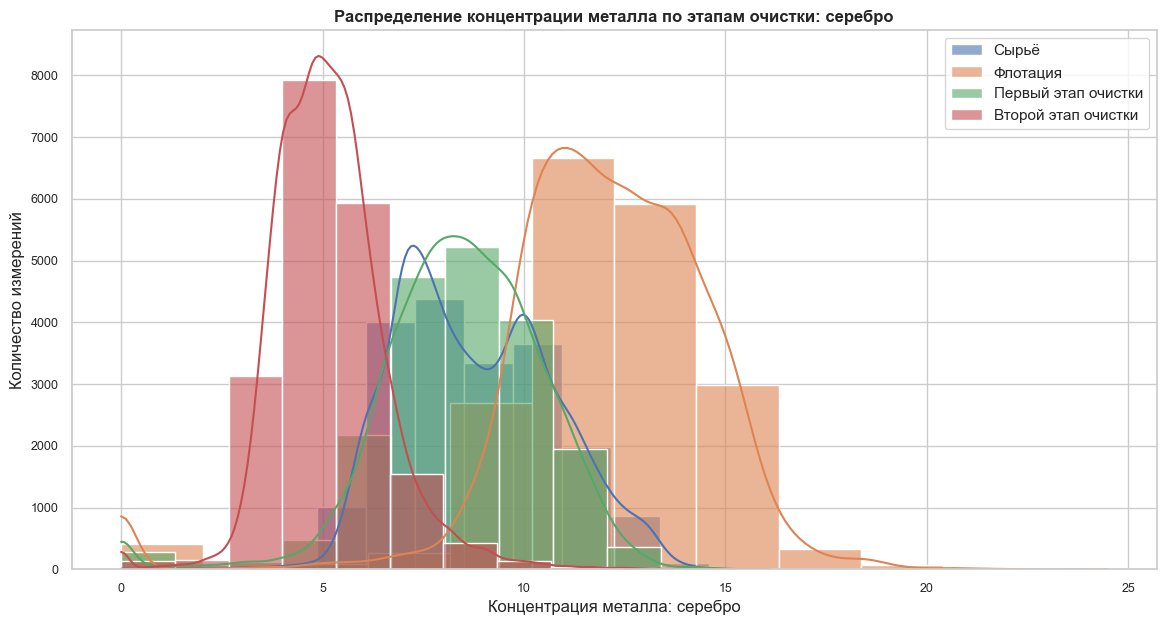

In [17]:
# объявление словаря с этапами очистки
phase_dict = {
    "rougher.input.feed_": "Сырьё",
    "rougher.output.concentrate_": "Флотация",
    "primary_cleaner.output.concentrate_": "Первый этап очистки",
    "final.output.concentrate_": "Второй этап очистки",
}
# объявление словаря с названиями металлов
metal_dict = {"ag": "серебро", "pb": "свинец", "au": "золото"}


# функция для построения гистограммы
def get_concentrate(metal):

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 7))

    for phase, title in phase_dict.items():
        ax = sns.histplot(
            full_df,
            x=phase + metal,
            kde=True,
            label=title,
            bins=12,
            palette="hls",
            alpha=0.6,
        )
    plt.title(
        "Распределение концентрации металла по этапам очистки: " + metal_dict[metal],
        weight="bold",
    )
    plt.xlabel("Концентрация металла: " + metal_dict[metal])
    plt.ylabel("Количество измерений")
    plt.tick_params(labelsize=9)
    plt.legend()
    plt.show()


# вызов функции для серебра
get_concentrate(metal="ag")

На гистограмме видно некоторое количество измерений с концентрацией серебра равной нулю.\
Так как строки с нулевыми данными мешают анализу данных, необходимо обработать их:
- либо заполнить каким-либо значением, не равным нулю
- либо удалить.

Заполнение нулевых значений не подойдет в данном случае для предобработки данных:
- во-первых, такие данные могли получиться в результате сбоя в процессе записи в таблицу,\
  и, как следствие, ошибочные данные могут быть и в других ячейках строк с нулевыми значениями;
- во-вторых, на данных будет проводиться обучение моделей, поэтому нулевые значения исказят общую картину.

Поэтому необходимо удалить эти данные.

Так как исходный датасет содержит обучающую и тестовую выборки, из них тоже необходимо удалить строки с нулевыми значениями.

Найдем общие строки с нулевыми данными концентраций металлов для датафреймов ***full_df*** и ***train_df***

In [19]:
# нахождение общих строк
train_del_df = train_df.merge(
    full_df[
        (full_df["rougher.input.feed_ag"] == 0)
        | (full_df["rougher.output.concentrate_ag"] == 0)
        | (full_df["primary_cleaner.output.concentrate_ag"] == 0)
        | (full_df["final.output.concentrate_ag"] == 0)
    ],
    on="date",
)
# подсчет количества строк
print(train_del_df["date"].count())

424


Удалим строки с нулевыми значениями из датафрейма ***train_df***

In [20]:
# удаление строк
train_df = train_df.query('date not in @train_del_df["date"]').reset_index(drop=True)

Проверим удаление

In [21]:
# вывод общей информации о датафрейме
train_df[
    [
        "rougher.input.feed_ag",
        "rougher.output.concentrate_ag",
        "primary_cleaner.output.concentrate_ag",
        "final.output.concentrate_ag",
    ]
].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rougher.input.feed_ag                  13725 non-null  float64
 1   rougher.output.concentrate_ag          13725 non-null  float64
 2   primary_cleaner.output.concentrate_ag  13725 non-null  float64
 3   final.output.concentrate_ag            13725 non-null  float64
dtypes: float64(4)
memory usage: 429.0 KB


Проанализируем потерю данных

In [22]:
print(f"Датафрейм для анализа данных содержит {train_df.shape[0]} строк.")
print(f"Первоначальный датафрейм содержал {train_rows_before} строк.")
print(f"Удалено {train_rows_before-train_df.shape[0]} строки.")
print(
    f"Это примерно {round(100-(train_df.shape[0]/train_rows_before*100), 2)}% от первоначального размера датафрейма."
)

Датафрейм для анализа данных содержит 13725 строк.
Первоначальный датафрейм содержал 14149 строк.
Удалено 424 строки.
Это примерно 3.0% от первоначального размера датафрейма.


Найдем общие строки для датафреймов ***full_df*** и ***test_df***

In [24]:
# нахождение общих строк
test_del_df = test_df.merge(
    full_df[
        (full_df["rougher.input.feed_ag"] == 0)
        | (full_df["rougher.output.concentrate_ag"] == 0)
        | (full_df["primary_cleaner.output.concentrate_ag"] == 0)
        | (full_df["final.output.concentrate_ag"] == 0)
    ],
    on="date",
)
# подсчет количества строк
print(test_del_df["date"].count())

167


Удалим строки с нулевыми значениями из датафрейма ***test_df***

In [25]:
# удаление строк
test_df = test_df.query('date not in @test_del_df["date"]').reset_index(drop=True)

Проверим удаление

In [26]:
# вывод общей информации о датафрейме
test_df[["rougher.input.feed_ag"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5123 entries, 0 to 5122
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rougher.input.feed_ag  5123 non-null   float64
dtypes: float64(1)
memory usage: 40.2 KB


Проанализируем потерю данных

In [27]:
print(f"Датафрейм для анализа данных содержит {test_df.shape[0]} строк.")
print(f"Первоначальный датафрейм содержал {test_rows_before} строк.")
print(f"Удалено {test_rows_before-test_df.shape[0]} строки.")
print(
    f"Это примерно {round(100-(test_df.shape[0]/test_rows_before*100), 2)}% от первоначального размера датафрейма."
)

Датафрейм для анализа данных содержит 5123 строк.
Первоначальный датафрейм содержал 5290 строк.
Удалено 167 строки.
Это примерно 3.16% от первоначального размера датафрейма.


Удалим строки с нулевыми значениями из датафрейма ***full_df***

In [28]:
# удаление строк по условию
full_df = full_df[
    ~(
        (full_df["rougher.input.feed_ag"] == 0)
        | (full_df["rougher.output.concentrate_ag"] == 0)
        | (full_df["primary_cleaner.output.concentrate_ag"] == 0)
        | (full_df["final.output.concentrate_ag"] == 0)
    )
]

Еще раз построим гистограмму для анализа распределения частоты различных концентраций металлов по серебру.

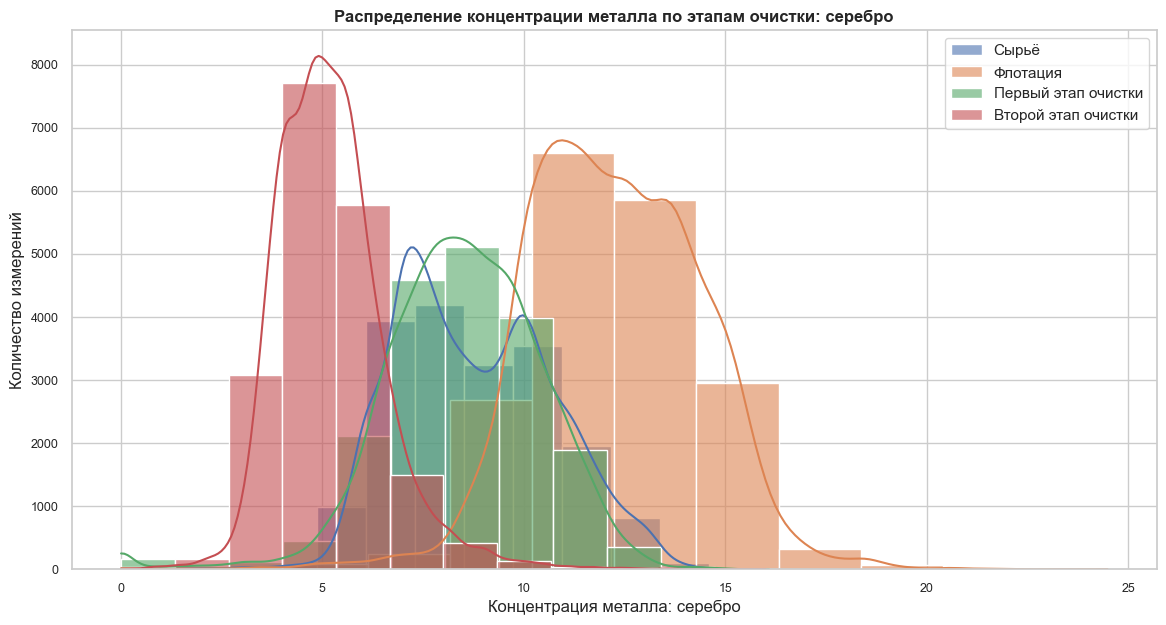

In [29]:
# вызов функции построения гистограммы для серебра
get_concentrate(metal="ag")

***

***ВЫВОД:***
На гистограмме наблюдается сначала рост концентрации серебра от состояния сырья до этапа флотации, а затем уменьшение концентрации на первом этапе очистки, и далее - на втором.

### Анализ изменений концентрации свинца

Так как есть вероятность, что в датафреймах есть  нулевые значения концентрации металлов свинца и золота,\
повторим удаление строк с нулевыми значениями в датафреймах ***train_df***, ***test_df*** и ***full_df***

In [31]:
# нахождение общих строк
train_del_df = train_df.merge(
    full_df[
        (full_df["rougher.input.feed_au"] == 0)
        | (full_df["rougher.output.concentrate_au"] == 0)
        | (full_df["primary_cleaner.output.concentrate_au"] == 0)
        | (full_df["final.output.concentrate_au"] == 0)
        | (full_df["rougher.input.feed_pb"] == 0)
        | (full_df["rougher.output.concentrate_pb"] == 0)
        | (full_df["primary_cleaner.output.concentrate_pb"] == 0)
        | (full_df["final.output.concentrate_pb"] == 0)
    ],
    on="date",
)
# подсчет количества строк
print(train_del_df["date"].count())

# нахождение общих строк
test_del_df = train_df.merge(
    full_df[
        (full_df["rougher.input.feed_au"] == 0)
        | (full_df["rougher.input.feed_pb"] == 0)
    ],
    on="date",
)
# подсчет количества строк
print(test_del_df["date"].count())

0
0


Строк с нулевыми значениями концентраций свинца и золота нет.\
Вероятно, нулевые значения были в тех же строках, что и по серебру.

Проверим на нулевые значения в концентрациях металлов датафрейм ***full_df***

In [32]:
# срез данных по условию
full_df[
    (
        (full_df["rougher.input.feed_au"] == 0)
        | (full_df["rougher.output.concentrate_au"] == 0)
        | (full_df["primary_cleaner.output.concentrate_au"] == 0)
        | (full_df["final.output.concentrate_au"] == 0)
        | (full_df["rougher.input.feed_pb"] == 0)
        | (full_df["rougher.output.concentrate_pb"] == 0)
        | (full_df["primary_cleaner.output.concentrate_pb"] == 0)
        | (full_df["final.output.concentrate_pb"] == 0)
    )
].count().sort_values(ascending=False)

date                                          0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_e_air               0
                                             ..
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_b_air        0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Построим гистограмму по свинцу

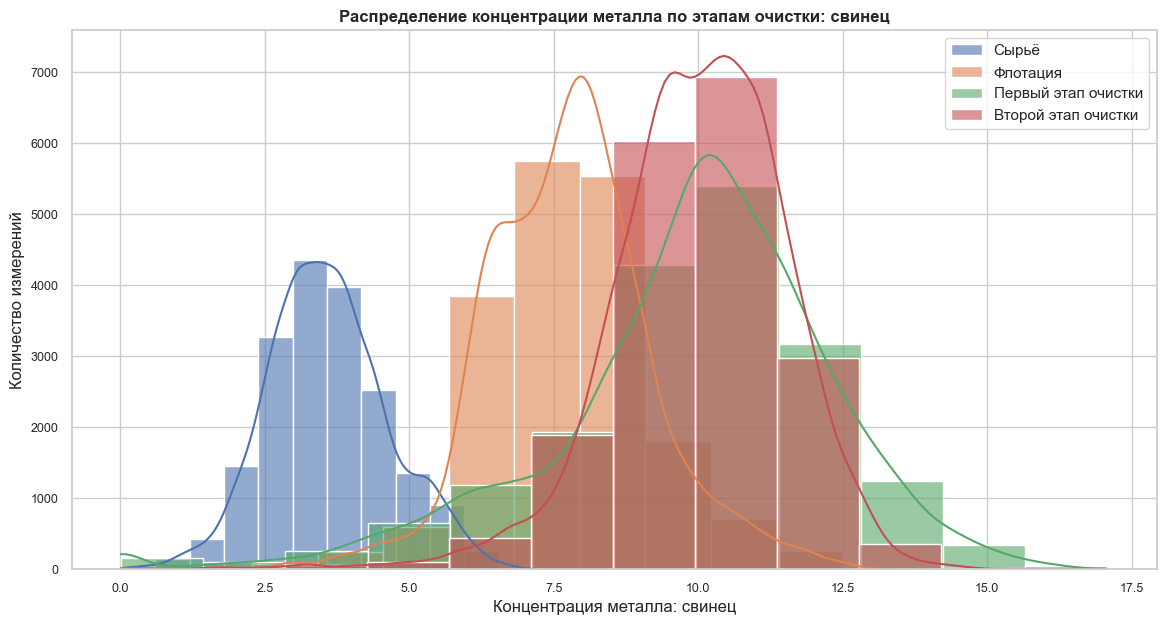

In [33]:
# вызов функции построения гистограммы для свинца
get_concentrate(metal="pb")

***

***ВЫВОД:***
На гистограмме видно, что концентрация свинца от этапа к этапу возрастает: от сырья к флотации - значительно, далее - не существенно.

### Анализ изменений концентрации золота

Построим гистограмму по золоту

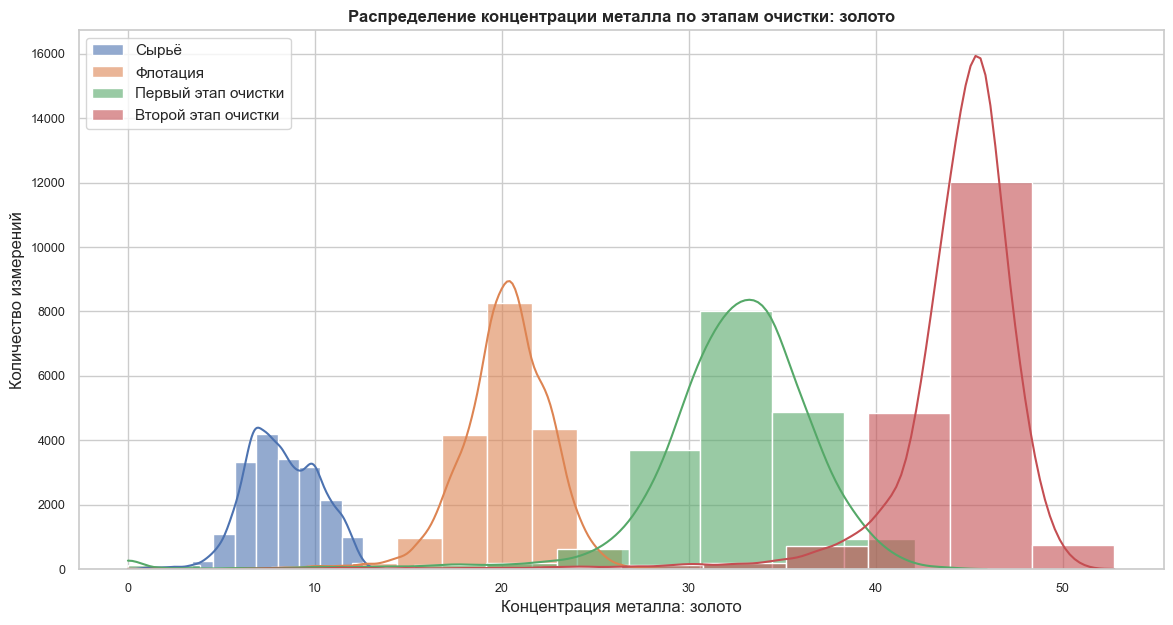

In [34]:
# вызов функции построения гистограммы для золота
get_concentrate(metal="au")

***

***ВЫВОД:***
Концентрация золота существенно возрастает от этапа к этапу.

***

### ОБЩИЙ ВЫВОД ПО АНАЛИЗУ КОНЦЕНТРАЦИЙ МЕТАЛЛОВ:
1. Концентрации металлов на различных стадиях производства меняются.
2. На гистограмме наблюдается сначала рост концентрации серебра от состояния сырья до этапа флотации, а затем уменьшение концентрации на первом этапе очистки, и далее - на втором.
3. На гистограмме видно, что концентрация свинца от этапа к этапу возрастает: от сырья к флотации - значительно, далее - не существенно.
4. Концентрация золота существенно возрастает от этапа к этапу.
5. Для корректного отображения результатов очистки были удалены строки с нулевыми значениями концентрации металлов:
   - 424 строки в ***train_df***
   - 167 строк в ***test_df***
6. Были выведены количественные результаты удаления строк.

## Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Сравнение распределения размеров гранул сырья на тестовой и обучающей выборках проведем на признаках:
- `'rougher.input.feed_size'`
- `'primary_cleaner.input.feed_size'`

### Сравнение по признаку `'rougher.input.feed_size'`

Построим график распределения для первоначального сырья.

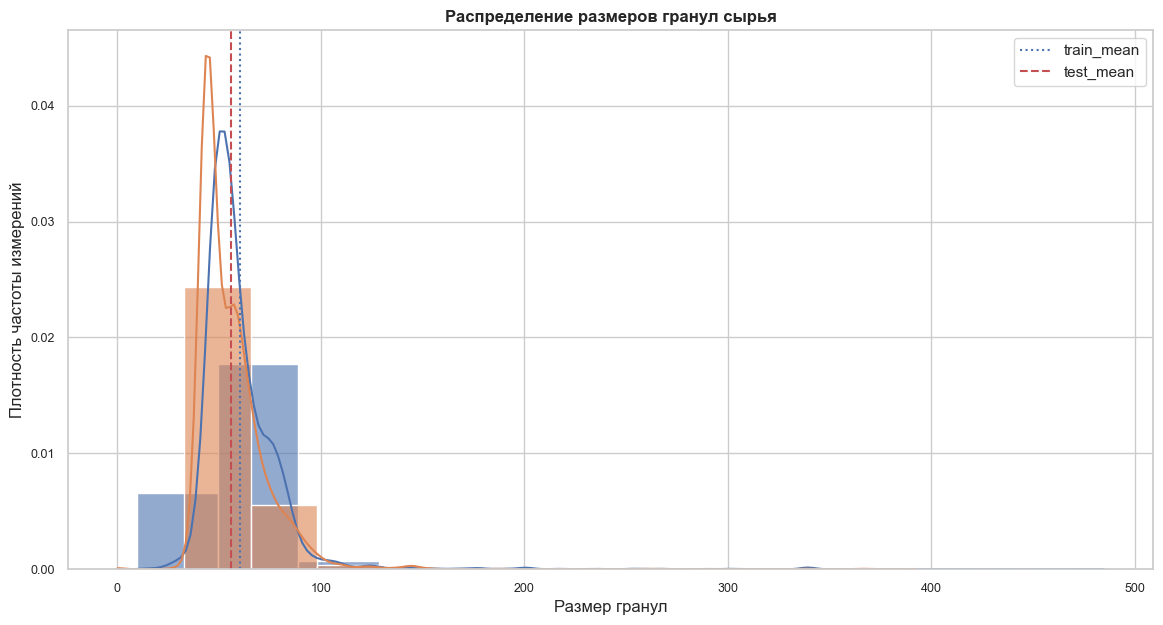

In [35]:
# объявление переменных для среднего
train_mean_value = train_df["rougher.input.feed_size"].mean()
test_mean_value = test_df["rougher.input.feed_size"].mean()

# построение графика
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

for df in [train_df, test_df]:
    ax = sns.histplot(
        df,
        x="rougher.input.feed_size",
        kde=True,
        stat="density",
        common_norm=False,
        bins=12,
        palette="hls",
        alpha=0.6,
    )
plt.title(
    "Распределение размеров гранул сырья",
    weight="bold",
)
plt.xlabel("Размер гранул")
plt.ylabel("Плотность частоты измерений")
# Добавление вертикальных линий для среднего значения
plt.axvline(x=train_mean_value, label="train_mean", color="b", linestyle=":")
plt.axvline(x=test_mean_value, label="test_mean", color="r", linestyle="--")
plt.tick_params(labelsize=9)
plt.legend()
plt.show()

На гистограмме видны значения около нуля. Также заметно, что есть выбросы по размеру до 500

Построим диаграмму размаха, чтобы внимательнее посмотреть на выбросы и околонулевые значения

Text(0.5, 0, 'Выборки')

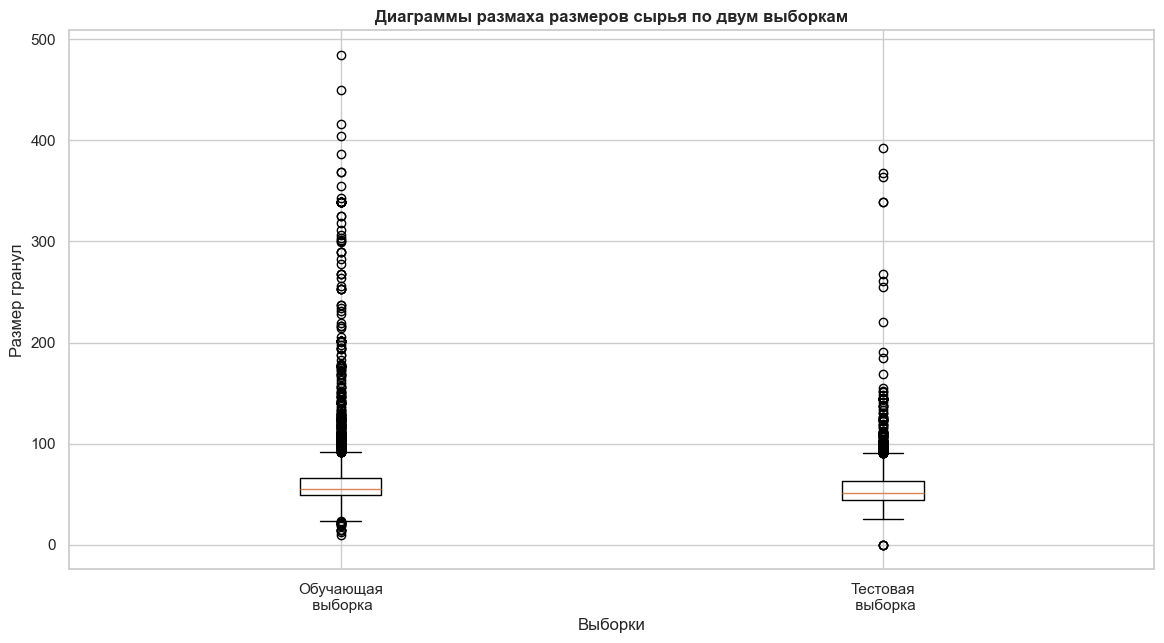

In [36]:
# построение ящиков с усами
plt.figure(figsize=(14, 7))
plt.boxplot(
    [train_df["rougher.input.feed_size"], test_df["rougher.input.feed_size"]],
    labels=["Обучающая\n выборка", "Тестовая\n выборка"],
)
plt.title(
    "Диаграммы размаха размеров сырья по двум выборкам",
    weight="bold",
)
plt.ylabel("Размер гранул")
plt.xlabel("Выборки")

На диаграмме размаха присутствует большое количество выбросов как для тестовой, так и для обучающей выборок.\
Выбросы могут негативно сказаться на анализе данных, а в дальнейшем на обучении модели и её тестировании.\
Нужно отсечь некоторое количество данных с выбросами так, чтобы выборка существенно не уменьшилась,\
иначе она станет не репрезентативной.

Для дальнейшего анализа рекомендуется отсечь данные
которые больше 99% значений и меньше 1% данных.

In [37]:
# условие для отсечения данных
train_condition_rougher = (
    "@train_df['rougher.input.feed_size'] >= @train_df['rougher.input.feed_size'].quantile(0.01) and "
    "@train_df['rougher.input.feed_size'] <= @train_df['rougher.input.feed_size'].quantile(0.99)"
)
test_condition_rougher = (
    "@test_df['rougher.input.feed_size'] >= @test_df['rougher.input.feed_size'].quantile(0.01) and "
    "@test_df['rougher.input.feed_size'] <= @test_df['rougher.input.feed_size'].quantile(0.99)"
)

# вывод численного описания столбца датафрейма по условию
print(
    train_df.query(train_condition_rougher)["rougher.input.feed_size"]
    .describe()
    .round(2)
)
test_df.query(test_condition_rougher)["rougher.input.feed_size"].describe().round(2)

count    13449.00
mean        58.94
std         13.50
min         35.55
25%         49.17
50%         55.39
75%         65.79
max        128.21
Name: rougher.input.feed_size, dtype: float64


count    5019.00
mean       55.10
std        13.63
min        38.63
25%        43.95
50%        51.01
75%        62.11
max       111.08
Name: rougher.input.feed_size, dtype: float64

Выведем численное описание возможной потери данных датафрейма ***train_df***

In [38]:
print(
    f"Датафрейм для анализа данных содержит {train_df.query(train_condition_rougher).shape[0]} строк."
)
print(f"Первоначальный датафрейм содержал {train_rows_before} строк.")
print(
    f"Удалено строк - {train_rows_before-train_df.query(train_condition_rougher).shape[0]}."
)
print(
    f"Это примерно {round(100-(train_df.query(train_condition_rougher).shape[0]/train_rows_before*100), 2)}% от первоначального размера датафрейма."
)

Датафрейм для анализа данных содержит 13449 строк.
Первоначальный датафрейм содержал 14149 строк.
Удалено строк - 700.
Это примерно 4.95% от первоначального размера датафрейма.


Выведем численное описание возможной потери данных датафрейма ***test_df***

In [39]:
print(
    f"Датафрейм для анализа данных содержит {test_df.query(test_condition_rougher).shape[0]} строк."
)
print(f"Первоначальный датафрейм содержал {test_rows_before} строк.")
print(
    f"Удалено строк - {test_rows_before-test_df.query(test_condition_rougher).shape[0]}."
)
print(
    f"Это примерно {round(100-(test_df.query(test_condition_rougher).shape[0]/test_rows_before*100), 2)}% от первоначального размера датафрейма."
)

Датафрейм для анализа данных содержит 5019 строк.
Первоначальный датафрейм содержал 5290 строк.
Удалено строк - 271.
Это примерно 5.12% от первоначального размера датафрейма.


Еще раз построим диаграмму размаха

Text(0.5, 0, 'Выборки')

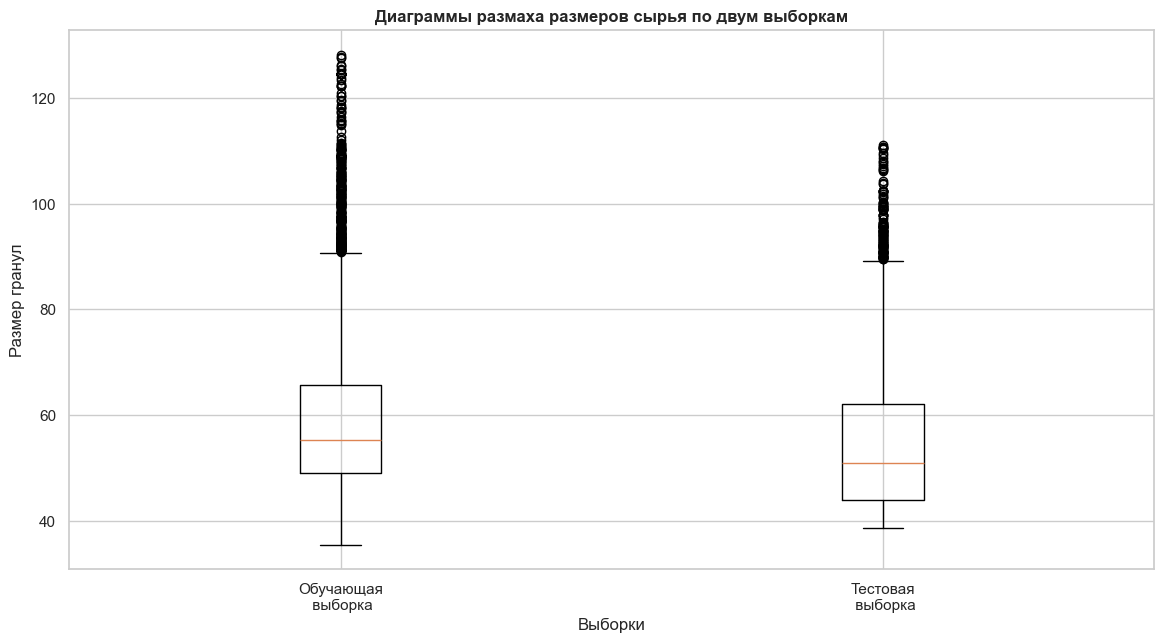

In [40]:
# построение ящиков с усами
plt.figure(figsize=(14, 7))
plt.boxplot(
    [
        train_df.query(train_condition_rougher)["rougher.input.feed_size"],
        test_df.query(test_condition_rougher)["rougher.input.feed_size"],
    ],
    labels=["Обучающая\n выборка", "Тестовая\n выборка"],
)
plt.title(
    "Диаграммы размаха размеров сырья по двум выборкам",
    weight="bold",
)
plt.ylabel("Размер гранул")
plt.xlabel("Выборки")

Проведем ttest для проверки гипотезы о равенстве среднего в двух выборках

In [41]:
# проведение теста
t_stat_rougher, p_value_rougher = stats.ttest_ind(
    train_df.query(train_condition_rougher)["rougher.input.feed_size"],
    test_df.query(test_condition_rougher)["rougher.input.feed_size"],
    equal_var=False,
)
# вывод результатов ttest
print(f"T-statistic: {t_stat_rougher}, P-value: {p_value_rougher}")
print()
if p_value_rougher < 0.05:
    print("Средние значения различаются значимо")
else:
    print("Значимых различий средних значений не выявлено")

T-statistic: 17.066040909069304, P-value: 2.7634240768951698e-64

Средние значения различаются значимо


Подтвердим выводы

In [42]:
print(
    f'Среднее в обучающей выборке - {round(train_df.query(train_condition_rougher)["rougher.input.feed_size"].mean(), 3)}'
)
print(
    f'Среднее в тестовой выборке - {round(test_df.query(test_condition_rougher)["rougher.input.feed_size"].mean(), 3)}'
)
print("Относительная разница средних составляет", end=" ")
print(
    round(
        (
            train_df["rougher.input.feed_size"].mean()
            - test_df["rougher.input.feed_size"].mean()
        )
        / train_df["rougher.input.feed_size"].mean(),
        3,
    )
)

Среднее в обучающей выборке - 58.936
Среднее в тестовой выборке - 55.1
Относительная разница средних составляет 0.071


***

***ВЫВОД:***
1. Распределения размеров гранул сырья на обучающей и тестовой выборках для признака `'rougher.input.feed_size'` имеют существенные отличия.
2. В данных присутствует большое количество выбросов.
3. Ограничение выбросов сглаживает разброс данных незначительно.
4. Удаление выбросов нежелательно, так как это может сказаться на качестве обучения модели.
5. При ограничении выбросов относительная разница средних существенна - около 7%
6. Проведенный *ttest_ind* показал **p-value** со значением близким к нулю - средние различаются значимо.
7. Для принятия решения по ограничению или удалению выбросов требуется дополнительная информация.

### Сравнение по признаку `'primary_cleaner.input.feed_size'`

Построим график распределения для сырья после флотации.

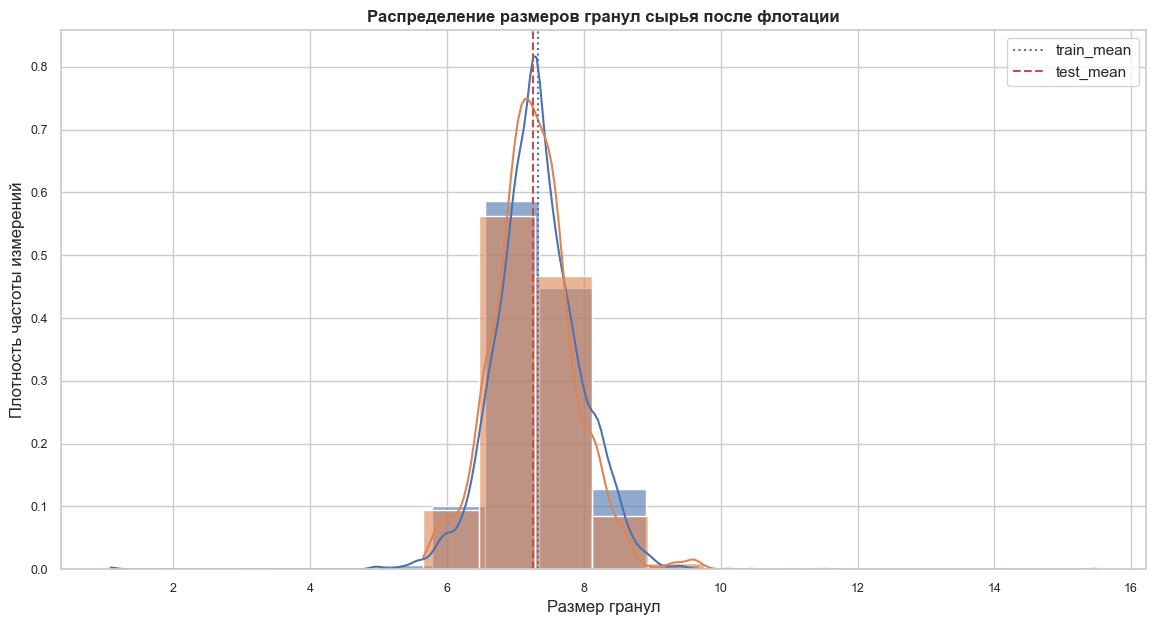

In [43]:
# объявление переменных для среднего
train_mean_value = train_df["primary_cleaner.input.feed_size"].mean()
test_mean_value = test_df["primary_cleaner.input.feed_size"].mean()

# построение графика
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

for df in [train_df, test_df]:
    ax = sns.histplot(
        df,
        x="primary_cleaner.input.feed_size",
        kde=True,
        stat="density",
        common_norm=False,
        bins=12,
        palette="hls",
        alpha=0.6,
    )
plt.title(
    "Распределение размеров гранул сырья после флотации",
    weight="bold",
)
plt.xlabel("Размер гранул")
plt.ylabel("Плотность частоты измерений")
# Добавление вертикальной линии для среднего значения с синим цветом и точечной линией
plt.axvline(x=train_mean_value, label="train_mean", color="b", linestyle=":")
# Добавление вертикальной линии для медианного значения с красным цветом и пунктирной линией
plt.axvline(x=test_mean_value, label="test_mean", color="r", linestyle="--")
plt.tick_params(labelsize=9)
plt.legend()
plt.show()

По признаку `'primary_cleaner.input.feed_size'` данные более однородны.\
На этом графике также заметны выбросы.\
Построим диаграмму размаха.

Text(0.5, 0, 'Выборки')

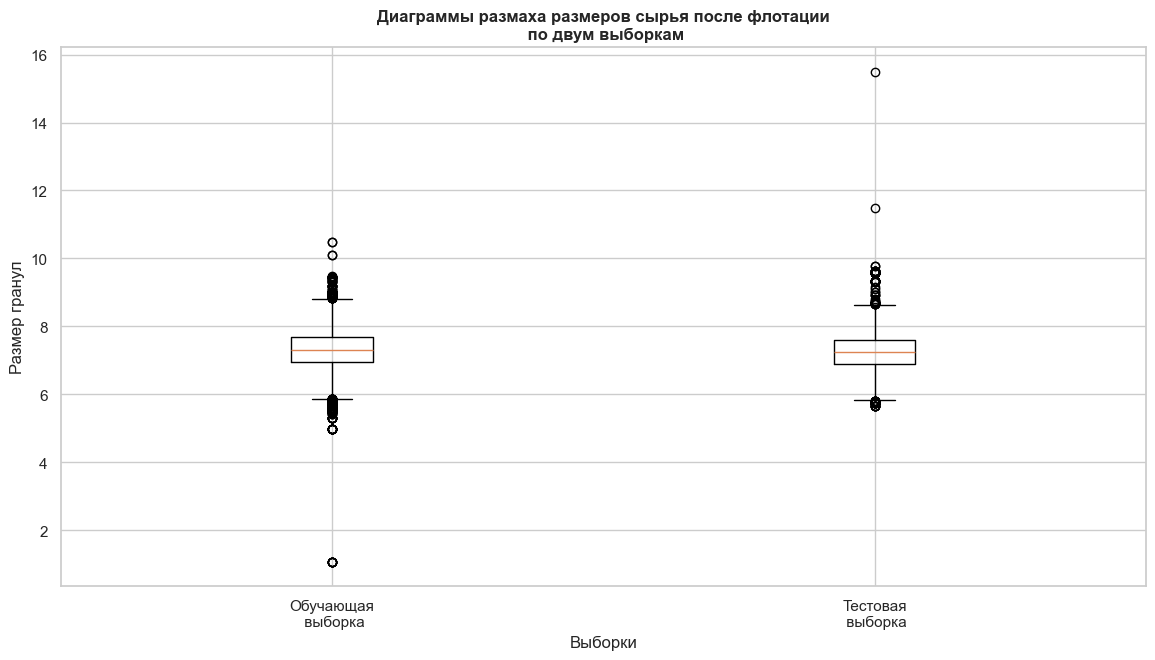

In [44]:
# построение ящиков с усами
plt.figure(figsize=(14, 7))
plt.boxplot(
    [
        train_df["primary_cleaner.input.feed_size"],
        test_df["primary_cleaner.input.feed_size"],
    ],
    labels=["Обучающая\n выборка", "Тестовая\n выборка"],
)
plt.title(
    "Диаграммы размаха размеров сырья после флотации\n по двум выборкам",
    weight="bold",
)
plt.ylabel("Размер гранул")
plt.xlabel("Выборки")

В целом данные по признаку `'primary_cleaner.input.feed_size'` более однородные, чем по `'rougher.input.feed_size'`\
Но также на диаграмме присутствует большое количество выбросов.

Для дальнейшего анализа рекомендуется отсечь данные
которые больше 99% значений и меньше 1% данных.

In [45]:
# условие для отсечения данных
train_condition_pc = (
    "@train_df['primary_cleaner.input.feed_size'] >= @train_df['primary_cleaner.input.feed_size'].quantile(0.01) and "
    "@train_df['primary_cleaner.input.feed_size'] <= @train_df['primary_cleaner.input.feed_size'].quantile(0.99)"
)
test_condition_pc = (
    "@test_df['primary_cleaner.input.feed_size'] >= @test_df['primary_cleaner.input.feed_size'].quantile(0.01) and "
    "@test_df['primary_cleaner.input.feed_size'] <= @test_df['primary_cleaner.input.feed_size'].quantile(0.99)"
)

# вывод численного описания столбца датафрейма по условию
print(
    train_df.query(train_condition_pc)["primary_cleaner.input.feed_size"]
    .describe()
    .round(2)
)
test_df.query(test_condition_pc)["primary_cleaner.input.feed_size"].describe().round(2)

count    13472.00
mean         7.32
std          0.56
min          5.85
25%          6.97
50%          7.30
75%          7.69
max          8.75
Name: primary_cleaner.input.feed_size, dtype: float64


count    5037.00
mean        7.25
std         0.54
min         5.86
25%         6.90
50%         7.24
75%         7.58
max         8.70
Name: primary_cleaner.input.feed_size, dtype: float64

Построим диаграмму размаха с обновленными данными

Text(0.5, 0, 'Выборки')

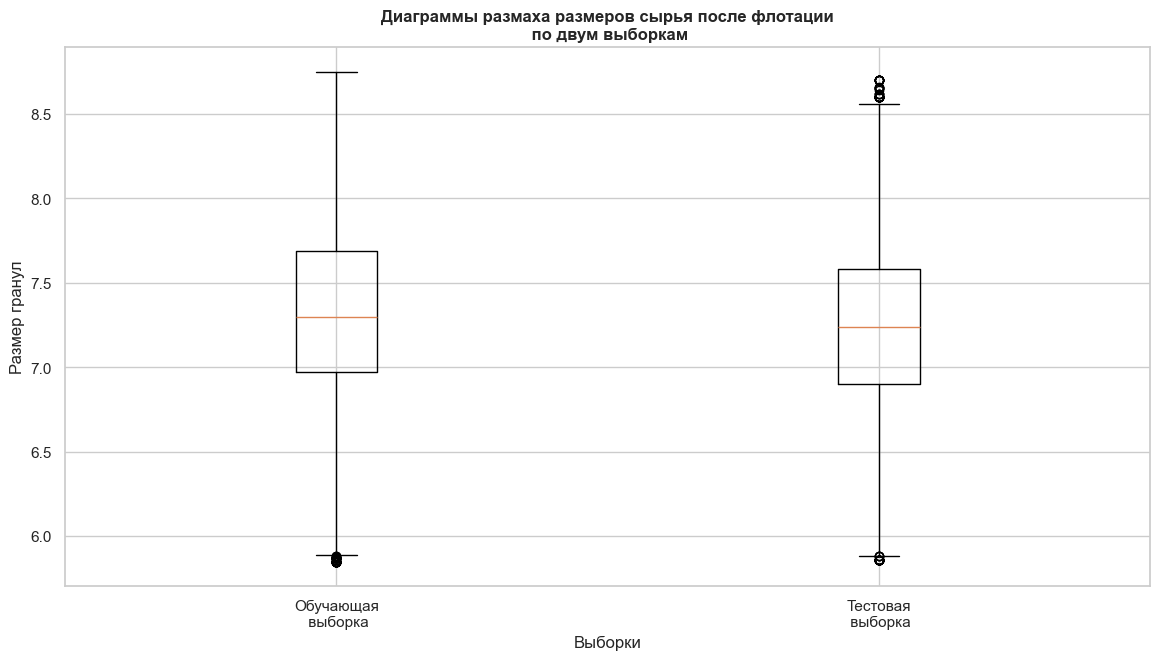

In [46]:
# построение ящиков с усами
plt.figure(figsize=(14, 7))
plt.boxplot(
    [
        train_df.query(train_condition_pc)["primary_cleaner.input.feed_size"],
        test_df.query(test_condition_pc)["primary_cleaner.input.feed_size"],
    ],
    labels=["Обучающая\n выборка", "Тестовая\n выборка"],
)
plt.title(
    "Диаграммы размаха размеров сырья после флотации\n по двум выборкам",
    weight="bold",
)
plt.ylabel("Размер гранул")
plt.xlabel("Выборки")

Проведем ttest для проверки гипотезы о равенстве среднего в двух выборках

In [47]:
# проведение теста
t_stat_pc, p_value_pc = stats.ttest_ind(
    train_df.query(train_condition_pc)["primary_cleaner.input.feed_size"],
    test_df.query(test_condition_pc)["primary_cleaner.input.feed_size"],
    equal_var=False,
)
# вывод результатов ttest
print(f"T-statistic: {t_stat_pc}, P-value: {p_value_pc}")
print()
if p_value_pc < 0.05:
    print("Средние значения различаются значимо")
else:
    print("Значимых различий средних значений не выявлено")

T-statistic: 8.677312664924322, P-value: 4.742706538658814e-18

Средние значения различаются значимо


Подтвердим выводы

In [48]:
print(
    f'Среднее в обучающей выборке - {round(train_df.query(train_condition_pc)["primary_cleaner.input.feed_size"].mean(), 3)}'
)
print(
    f'Среднее в тестовой выборке - {round(test_df.query(test_condition_pc)["primary_cleaner.input.feed_size"].mean(), 3)}'
)
print("Относительная разница средних составляет", end=" ")
print(
    round(
        (
            train_df["primary_cleaner.input.feed_size"].mean()
            - test_df["primary_cleaner.input.feed_size"].mean()
        )
        / train_df["primary_cleaner.input.feed_size"].mean(),
        3,
    )
)

Среднее в обучающей выборке - 7.325
Среднее в тестовой выборке - 7.246
Относительная разница средних составляет 0.009


***

***ВЫВОД:***
1. Распределения размеров гранул сырья на обучающей и тестовой выборках для признака `'primary_cleaner.input.feed_size'` имеют отличия.
2. В данных присутствует значительное количество выбросов.
3. Ограничение выбросов сглаживает разброс данных незначительно.
4. Удаление выбросов нежелательно, так как это может сказаться на качестве обучения модели.
5. При ограничении выбросов относительная разница средних не существенна - менее 1%
6. Проведенный *ttest_ind* показал **p-value** со значением близким к нулю - средние различаются значимо.
7. Для принятия решения по ограничению или удалению выбросов требуется дополнительная информация.

## Анализ суммарной концентрации всех веществ на разных стадиях

Просуммируем строки

In [49]:
# список столбцов датафрейма
columns_lst = full_df.columns.tolist()


# объявление суммирующей функции
def get_sum_concentrate(find, column_name):
    concentrate_lst = list(
        filter(
            lambda x: find in x and ("au" in x or "ag" in x or "pb" in x or "sol" in x),
            columns_lst,
        )
    )
    full_df[column_name] = (
        full_df[concentrate_lst[0]]
        + full_df[concentrate_lst[1]]
        + full_df[concentrate_lst[2]]
        + full_df[concentrate_lst[3]]
    )

In [50]:
# вызов функции для каждого нового столбца
get_sum_concentrate("final.output.concentrate_", "sum_final_concentrate")
get_sum_concentrate(
    "primary_cleaner.output.concentrate_", "sum_primary_cleaner_concentrate"
)
get_sum_concentrate("rougher.output.concentrate_", "sum_rougher_concentrate")
get_sum_concentrate("rougher.input.feed_", "sum_feed_concentrate")

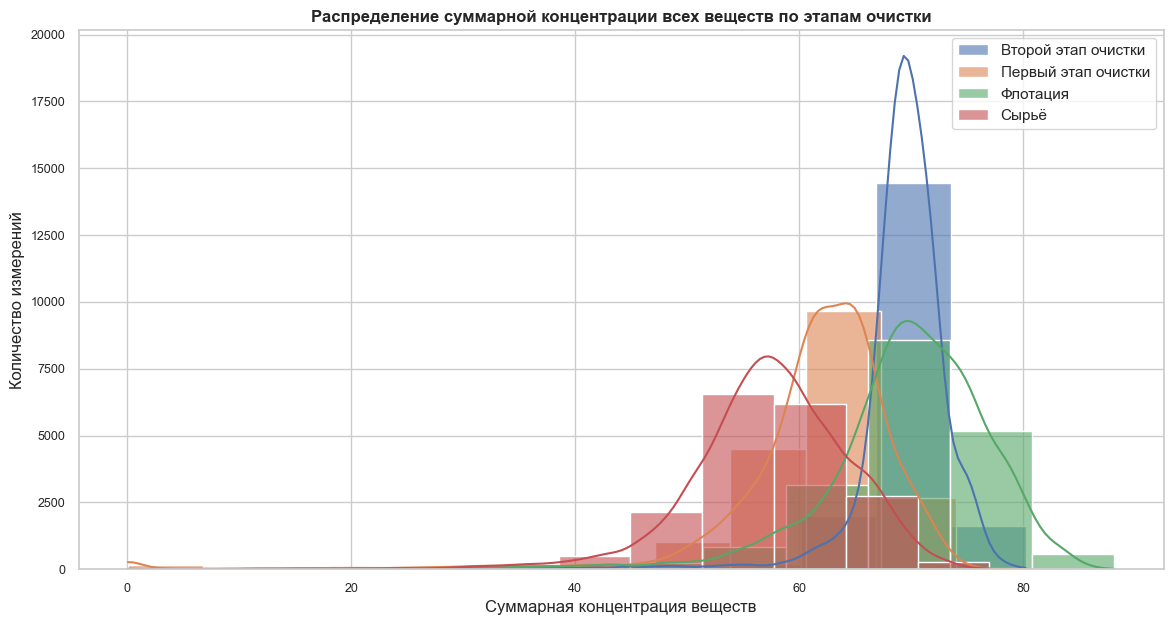

In [51]:
# объявление словаря
sum_concentrate_dict = {
    "sum_final_concentrate": "Второй этап очистки",
    "sum_primary_cleaner_concentrate": "Первый этап очистки",
    "sum_rougher_concentrate": "Флотация",
    "sum_feed_concentrate": "Сырьё",
}

# построение графика
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

for phase, title in sum_concentrate_dict.items():
    ax = sns.histplot(
        full_df,
        x=phase,
        kde=True,
        label=title,
        bins=12,
        palette="hls",
        alpha=0.6,
    )
plt.title(
    "Распределение суммарной концентрации всех веществ по этапам очистки",
    weight="bold",
)
plt.xlabel("Суммарная концентрация веществ")
plt.ylabel("Количество измерений")
plt.tick_params(labelsize=9)
plt.legend()
plt.show()

***

***ВЫВОД:***
1. Суммарная концентрация веществ сначала возрастает от сырья к флотации, что вероятно обусловлено добавлением флотационных реагентов.
2. Далее суммарная концентрация веществ сначала уменьшается после первого этапа очистки, и увеличивается после второго этапа

***

## ОБЩИЙ ВЫВОД ПО АНАЛИЗУ ДАННЫХ
1. Концентрация серебра на различных стадиях производства меняется: сначала наблюдаетсярост концентрации серебра от состояния сырья до этапа флотации, а затем уменьшение концентрации на первом этапе очистки, и далее - на втором.
2. Концентрация свинца от этапа к этапу возрастает: от сырья к флотации - значительно, далее - не существенно.
3. Концентрация золота существенно возрастает от этапа к этапу.
5. Для корректного отображения результатов очистки были удалены строки с нулевыми значениями концентрации металлов:
   - 424 строки в ***train_df***
   - 167 строк в ***test_df***
6. Были выведены количественные результаты удаления строк.
7. Распределения размеров гранул сырья на обучающей и тестовой выборках для признака `'rougher.input.feed_size'` имеют существенные отличия.
   - В данных присутствует большое количество выбросов, их ограничение сглаживает разброс данных незначительно.
   - При ограничении выбросов относительная разница средних существенна - около 7%
   - Проведенный *ttest_ind* показал **p-value** со значением близким к нулю - средние различаются значимо.
   - Для принятия решения по ограничению или удалению выбросов требуется дополнительная информация.
8. Распределения размеров гранул сырья на обучающей и тестовой выборках для признака `'primary_cleaner.input.feed_size'` имеют отличия.
   - В данных присутствует большое количество выбросов, их ограничение сглаживает разброс данных незначительно.
   - При ограничении выбросов относительная разница средних не существенна - менее 1%
   - Проведенный *ttest_ind* показал **p-value** со значением близким к нулю - средние различаются значимо.
   - Для принятия решения по ограничению или удалению выбросов требуется дополнительная информация.
9. Суммарная концентрация веществ сначала возрастает от сырья к флотации, что вероятно обусловлено добавлением флотационных реагентов.
10. Далее суммарная концентрация веществ сначала уменьшается после первого этапа очистки, и увеличивается после второго этапа

<a id='3'></a>
# Построение моделей

## Функция для вычисления итоговой sMAPE

In [52]:
# функция для метрики sMAPE
def smape(values, predictions):
    ans = abs(values - predictions) / ((abs(values) + abs(predictions)) / 2) * 100
    return ans.mean()


# функция для итоговой метрики sMAPE
def total_smape(metric_rougher, metric_final):
    return metric_rougher * 0.25 + metric_final * 0.75

## Подготовка данных для построения моделей

В бизнес-задаче с предсказанием коэффициента восстановления золота из золотосодержащей руды целевыми признаками являются значения столбцов `'rougher.output.recovery'` и `'final.output.recovery'`
Остальные столбцы датафрейма являются признаками.

Так как в тестовой выборке отсутствуют различные финальные и расчетные параметры, которые доступны только после прохождения всех этапов технологического процесса, эти параметры также нужно исключить из обучающей выборки:
- во-первых, эти параметры недоступны до начала производства, поэтому они не могут быть использованы для обучения модели;
- во-вторых, чтобы синхронизировать процесс обучения и тестирования модели, необходимо, чтобы тестовая и обучающая выборки имели одинаковое количество признаков.

Удалим все "лишние" параметры из датафрейма ***train_df***, кроме параметров, являющихся целевыми.

In [53]:
# создание списка из списка значений, отсутствующих в test_df по сравнению с train_df, с удалением целевых признаков
remove_lst = [
    el
    for el in result_lst
    if el not in ("final.output.recovery", "rougher.output.recovery")
]
# удаление "лишних" параметров
train_df = train_df.drop(remove_lst, axis="columns")
# проверка удаления
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        13725 non-null  object 
 1   final.output.recovery                       13725 non-null  float64
 2   primary_cleaner.input.sulfate               13725 non-null  float64
 3   primary_cleaner.input.depressant            13725 non-null  float64
 4   primary_cleaner.input.feed_size             13725 non-null  float64
 5   primary_cleaner.input.xanthate              13725 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      13725 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    13725 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      13725 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    13725 non-null  float64
 10  primary_cl

Добавим к тестовой выборке целевые признаки из датафрейма с исходными данными с помощью метода *merge()*

In [54]:
# нахождение общих строк
test_df = test_df.merge(
    full_df[["final.output.recovery", "rougher.output.recovery", "date"]],
    on="date",
    how="left",
)
# вывод общей информации
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5123 entries, 0 to 5122
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5123 non-null   object 
 1   primary_cleaner.input.sulfate               5123 non-null   float64
 2   primary_cleaner.input.depressant            5123 non-null   float64
 3   primary_cleaner.input.feed_size             5123 non-null   float64
 4   primary_cleaner.input.xanthate              5123 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5123 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5123 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5123 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5123 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5123 non-null   float64
 10  primary_clea

Так как в scikit-learn алгоритмы машинного обучения действительно обычно не умеют напрямую работать с данными типа datetime, удалим столбцы с данными  `'date'` из датафреймов. (Вместо того, чтобы их преобразовывать в другой формат из *object*)

In [55]:
# удаление столбца date
train_df = train_df.drop("date", axis=1)
test_df = test_df.drop("date", axis=1)

Разобъем обучающую выборку на собственно обучающую и валидационную, чтобы иметь возможность проверять качество работы алгоритма во время обучения модели.

In [56]:
# извлечение признаков
features_rougher = features_final = train_df.drop(
    ["final.output.recovery", "rougher.output.recovery"], axis=1
)
# извлечение целевых признаков
target_rougher = train_df["rougher.output.recovery"]
target_final = train_df["final.output.recovery"]

# отделение 25 % данных для вадидационной выборки
(
    features_train_rougher,
    features_valid_rougher,
    target_train_rougher,
    target_valid_rougher,
) = train_test_split(
    features_rougher, target_rougher, test_size=0.25, random_state=12345
)
features_train_final, features_valid_final, target_train_final, target_valid_final = (
    train_test_split(features_final, target_final, test_size=0.25, random_state=12345)
)

Проверим разбиение на выборки

In [57]:
print("Размеры:")
print(f" - обучающей выборки features_train_rougher: {features_train_rougher.shape}")
print(f" - обучающей выборки target_train_rougher: {target_train_rougher.shape[0]}")
print(
    f" - валидационной выборки features_valid_rougher: {features_valid_rougher.shape}"
)
print(f" - валидационной выборки target_valid_rougher: {target_valid_rougher.shape[0]}")
print(" ")
print(f" - обучающей выборки features_train_final: {features_train_final.shape}")
print(f" - обучающей выборки target_train_final: {target_train_final.shape[0]}")
print(f" - валидационной выборки features_valid_final: {features_valid_final.shape}")
print(f" - валидационной выборки target_valid_final: {target_valid_final.shape[0]}")

Размеры:
 - обучающей выборки features_train_rougher: (10293, 52)
 - обучающей выборки target_train_rougher: 10293
 - валидационной выборки features_valid_rougher: (3432, 52)
 - валидационной выборки target_valid_rougher: 3432
 
 - обучающей выборки features_train_final: (10293, 52)
 - обучающей выборки target_train_final: 10293
 - валидационной выборки features_valid_final: (3432, 52)
 - валидационной выборки target_valid_final: 3432


Подготовим также тестовую выборку для проверки моделей

In [58]:
# извлечение признаков
features_test_rougher = features_test_final = test_df.drop(
    ["final.output.recovery", "rougher.output.recovery"], axis=1
)
# извлечение целевых признаков
target_test_rougher = test_df["rougher.output.recovery"]
target_test_final = test_df["final.output.recovery"]

Проверим разделение

In [59]:
print("Размеры:")
print(f" - тестовой выборки features_test_rougher: {features_test_rougher.shape}")
print(f" - тестовой выборки target_test_rougher: {target_test_rougher.shape[0]}")
print(f" - тестовой выборки features_test_final: {features_test_final.shape}")
print(f" - тестовой выборки target_test_final: {target_test_final.shape[0]}")

Размеры:
 - тестовой выборки features_test_rougher: (5123, 52)
 - тестовой выборки target_test_rougher: 5123
 - тестовой выборки features_test_final: (5123, 52)
 - тестовой выборки target_test_final: 5123


***

***ВЫВОД:***
1. На этапе подготовки данных были определены целевые признаки
2. Были удалены "лишние" признаки в ***train_df***
3. Были добавлены целевые признаки в ***test_df*** из датафрейма с исходными данными с помощью метода merge()
4. Из ***train_df*** и ***test_df*** был удален признак `'date'`
5. Выборка ***train_df*** была раделена на обучающую и валидационнцю выборки.
6. Выборка ***test_df*** была подготовлена для тестирования.

## Создание моделей и оценка их качества

Так как целевые признаки количественные, то будем решать задачи регрессии

Создадим и исследуем модели
- модель дерева решений - *DecisionTreeRegressor*
- модель случайного леса - *RandomForestRegressor*
- модель линейной регрессии - *LinearRegression*

### Модель дерева решений

Создадим модель дерева решений,\
оценим правильность предсказаний модели для различных значений набора гиперпараметров:
- максимальная глубина дерева (***max_depth***) - от 1 до 31 с шагом 3;
- минимальное количество примеров для разделения (***min_samples_split***) - от 2 до 98 с шагом 8

***Создание модели дерева решений для признака `'rougher.output.recovery'`***

In [61]:
# объявление переменных
best_model_rougher = None
best_result_decision_tree_rougher = 10
best_depth_rougher = 0
best_min_samples_split_rougher = 0

# цикл для применения набора гиперпараметров
for depth in range(1, 32, 3):
    for samples in range(2, 99, 8):

        model_rougher = DecisionTreeRegressor(
            max_depth=depth, min_samples_split=samples, random_state=12345
        )  # создание объекта класса DecisionTreeRegressor

        model_rougher.fit(
            features_train_rougher, target_train_rougher
        )  # обучение модели

        predictions_valid_rougher = model_rougher.predict(
            features_valid_rougher
        )  # получение предсказания для признаков в валидационной выборке

        result_rougher = smape(
            target_valid_rougher, predictions_valid_rougher
        )  # вычисление метрики в валидационной выборке

        if (
            result_rougher < best_result_decision_tree_rougher
        ):  # сохранение лучших результатов в переменные
            best_model_rougher = model_rougher
            best_result_decision_tree_rougher = result_rougher
            best_depth_rougher = depth
            best_min_samples_split_rougher = samples

# вывод информации по модели с лучшим качеством
print(
    "Лучшая модель дерева решений для целевого признака rougher.output.recovery имеет гиперпараметры:"
)
print(f" - максимальная глубина дерева - {best_depth_rougher}")
print(
    f" - минимальное количество примеров для разделения - {best_min_samples_split_rougher}"
)
print(
    f"Качество модели по метрике sMAPE - {round(best_result_decision_tree_rougher, 3)}"
)

Лучшая модель дерева решений для целевого признака rougher.output.recovery имеет гиперпараметры:
 - максимальная глубина дерева - 31
 - минимальное количество примеров для разделения - 34
Качество модели по метрике sMAPE - 3.333


Проверим скорость обучения созданной модели дерева решений с заданными гиперпараметрами

In [62]:
%%timeit -n 10
best_model_rougher.fit(features_train_rougher, target_train_rougher)

1.3 s ± 5.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Проверим скорость работы созданной модели дерева решений с заданными гиперпараметрами

In [63]:
%%timeit -n 10
best_model_rougher.predict(features_valid_rougher)

3.16 ms ± 819 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Сохраним модель

In [64]:
# сохранение модели
dump(best_model_rougher, "model_decision_tree_rougher.joblib");

***Создание модели дерева решений для признака `'final.output.recovery'`***

In [65]:
# объявление переменных
best_model_final = None
best_result_decision_tree_final = 10
best_depth_final = 0
best_min_samples_split_final = 0

# цикл для применения набора гиперпараметров
for depth in range(1, 32, 3):
    for samples in range(2, 99, 8):

        model_final = DecisionTreeRegressor(
            max_depth=depth, min_samples_split=samples, random_state=12345
        )  # создание объекта класса DecisionTreeRegressor

        model_final.fit(features_train_final, target_train_final)  # обучение модели

        predictions_valid_final = model_final.predict(
            features_valid_final
        )  # получение предсказания для признаков в валидационной выборке

        result_final = smape(
            target_valid_final, predictions_valid_final
        )  # вычисление метрики в валидационной выборке

        if (
            result_final < best_result_decision_tree_final
        ):  # сохранение лучших результатов в переменные
            best_model_final = model_final
            best_result_decision_tree_final = result_final
            best_depth_final = depth
            best_min_samples_split_final = samples

# вывод информации по модели с лучшим качеством
print(
    "Лучшая модель дерева решений для целевого признака final.output.recovery имеет гиперпараметры:"
)
print(f" - максимальная глубина дерева - {best_depth_final}")
print(
    f" - минимальное количество примеров для разделения - {best_min_samples_split_final}"
)
print(
    f"Качество модели  по метрике sMAPE - {round(best_result_decision_tree_final, 3)}"
)

Лучшая модель дерева решений для целевого признака final.output.recovery имеет гиперпараметры:
 - максимальная глубина дерева - 22
 - минимальное количество примеров для разделения - 66
Качество модели  по метрике sMAPE - 7.103


Проверим скорость обучения созданной модели дерева решений с заданными гиперпараметрами

In [66]:
%%timeit -n 10
best_model_final.fit(features_train_final, target_train_final)

1.38 s ± 3.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Проверим скорость работы созданной модели дерева решений с заданными гиперпараметрами

In [67]:
%%timeit -n 10
best_model_final.predict(features_valid_final)

2.97 ms ± 672 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Сохраним модель

In [68]:
# сохранение модели
dump(best_model_final, "model_decision_tree_final.joblib");

### Модель случайного леса

Создадим модель случайного леса,\
оценим правильность предсказаний модели для различных значений набора гиперпараметров:
- максимальная глубина дерева (***max_depth***) - от 1 до 11;
- количество деревьев (***n_estimators***) - от 10 до 50 с шагом 10

In [69]:
# объявление переменных
best_model_rougher = None
best_result_random_forest_rougher = 10
best_depth_rougher = 0
best_est_rougher = 10


# цикл для применения набора гиперпараметров
for est in range(10, 51, 10):
    for depth in range(1, 11):

        model_rougher = RandomForestRegressor(
            max_depth=depth, n_estimators=est, random_state=12345
        )  # создание объекта класса RandomForestRegressor

        model_rougher.fit(
            features_train_rougher, target_train_rougher
        )  # обучение модели

        predictions_valid_rougher = model_rougher.predict(
            features_valid_rougher
        )  # получение предсказания для признаков в валидационной выборке

        result_rougher = smape(
            target_valid_rougher, predictions_valid_rougher
        )  # вычисление метрики в валидационной выборке

        if (
            result_rougher < best_result_random_forest_rougher
        ):  # сохранение лучших результатов в переменные
            best_model_rougher = model_rougher
            best_result_random_forest_rougher = result_rougher
            best_depth_rougher = depth
            best_est_rougher = est

# вывод информации по модели с лучшим качеством
print(
    "Лучшая модель случайного леса для целевого признака rougher.output.recovery имеет гиперпараметры:"
)
print(f" - максимальная глубина дерева - {best_depth_rougher}")
print(f" - количество деревьев - {best_est_rougher}")
print(
    f"Качество модели по метрике sMAPE - {round(best_result_random_forest_rougher, 3)}"
)

Лучшая модель случайного леса для целевого признака rougher.output.recovery имеет гиперпараметры:
 - максимальная глубина дерева - 10
 - количество деревьев - 50
Качество модели по метрике sMAPE - 2.994


Проверим скорость обучения созданной модели случайного леса с заданными гиперпараметрами

In [70]:
%%timeit -n 10
best_model_rougher.fit(features_train_rougher, target_train_rougher)

32 s ± 399 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Проверим скорость работы созданной модели случайного леса с заданными гиперпараметрами

In [71]:
%%timeit -n 10
best_model_rougher.predict(features_valid_rougher)

30.8 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Сохраним модель

In [72]:
# сохранение модели
dump(best_model_rougher, "model_random_forest_rougher.joblib");

***Создание модели случайного леса для признака `'final.output.recovery'`***

In [73]:
# объявление переменных
best_model_final = None
best_result_random_forest_final = 10
best_depth_final = 0
best_est_final = 10


# цикл для применения набора гиперпараметров
for est in range(10, 51, 10):
    for depth in range(1, 11):

        model_final = RandomForestRegressor(
            max_depth=depth, n_estimators=est, random_state=12345
        )  # создание объекта класса RandomForestRegressor

        model_final.fit(features_train_final, target_train_final)  # обучение модели

        predictions_valid_final = model_final.predict(
            features_valid_final
        )  # получение предсказания для признаков в валидационной выборке

        result_final = smape(
            target_valid_final, predictions_valid_final
        )  # вычисление метрики в валидационной выборке

        if (
            result_final < best_result_random_forest_final
        ):  # сохранение лучших результатов в переменные
            best_model_final = model_final
            best_result_random_forest_final = result_final
            best_depth_final = depth
            best_est_final = est

# вывод информации по модели с лучшим качеством
print(
    "Лучшая модель случайного леса для целевого признака final.output.recovery имеет гиперпараметры:"
)
print(f" - максимальная глубина дерева - {best_depth_final}")
print(f" - количество деревьев - {best_est_final}")
print(f"Качество модели по метрике sMAPE - {round(best_result_random_forest_final, 3)}")

Лучшая модель случайного леса для целевого признака final.output.recovery имеет гиперпараметры:
 - максимальная глубина дерева - 10
 - количество деревьев - 50
Качество модели по метрике sMAPE - 6.331


Проверим скорость обучения созданной модели случайного леса с заданными гиперпараметрами

In [74]:
%%timeit -n 10
best_model_final.fit(features_train_final, target_train_final)

32.1 s ± 122 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Проверим скорость работы созданной модели случайного леса с заданными гиперпараметрами

In [75]:
%%timeit -n 10
best_model_final.predict(features_valid_final)

34 ms ± 7.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Сохраним модель

In [76]:
# сохранение модели
dump(best_model_final, "model_random_forest_final.joblib");

### Модель линейной регрессии

Создадим модель линейной регрессии

***Создание модели линейной регрессии для признака `'rougher.output.recovery'`***

In [77]:
# создание объекта класса LinearRegression
model_rougher = LinearRegression()

# обучение модели
model_rougher.fit(features_train_rougher, target_train_rougher)

# получение предсказания для признаков в валидационной выборке
predictions_valid_rougher = model_rougher.predict(features_valid_rougher)

# вычисление метрики в валидационной выборке
result_rougher = smape(target_valid_rougher, predictions_valid_rougher)

# вывод информации по модели
print("Модель линейной регрессии для целевого признака rougher.output.recovery")
print(f"Качество модели по метрике sMAPE - {round(result_rougher, 3)}")

Модель линейной регрессии для целевого признака rougher.output.recovery
Качество модели по метрике sMAPE - 4.692


Проверим скорость обучения созданной модели линейной регрессии

In [78]:
%%timeit -n 10
model_rougher.fit(features_train_rougher, target_train_rougher)

65.4 ms ± 8.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Проверим скорость работы созданной модели линейной регрессии

In [79]:
%%timeit -n 10
model_rougher.predict(features_valid_rougher)

2.64 ms ± 941 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Сохраним модель

In [80]:
# сохранение модели
dump(model_rougher, "model_linear_regression_rougher.joblib");

***Создание модели линейной регрессии для признака `'final.output.recovery'`***

In [81]:
# создание объекта класса LinearRegression
model_final = LinearRegression()

# обучение модели
model_final.fit(features_train_final, target_train_final)

# получение предсказания для признаков в валидационной выборке
predictions_valid_final = model_final.predict(features_valid_final)

# вычисление метрики в валидационной выборке
result_final = smape(target_valid_final, predictions_valid_final)

# вывод информации по модели
print("Модель линейной регрессии для целевого признака final.output.recovery")
print(f"Качество модели по метрике sMAPE - {round(result_final, 3)}")

Модель линейной регрессии для целевого признака final.output.recovery
Качество модели по метрике sMAPE - 7.963


Проверим скорость обучения созданной модели линейной регрессии

In [82]:
%%timeit -n 10
model_final.fit(features_train_final, target_train_final)

65.9 ms ± 8.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Проверим скорость работы созданной модели линейной регрессии

In [83]:
%%timeit -n 10
model_final.predict(features_valid_final)

2.39 ms ± 491 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Сохраним модель

In [84]:
# сохранение модели
dump(model_final, "model_linear_regression_final.joblib");

### Проверка моделей на адекватность

Для проверки моделей на адекватность воспользуемся простейшей моделью DummyRegressor

***Создание модели DummyRegressor для признака `'rougher.output.recovery'`***

In [85]:
# создание объекта класса DummyRegressor
model_rougher = DummyRegressor()

# обучение модели
model_rougher.fit(features_train_rougher, target_train_rougher)

# получение предсказания для признаков в валидационной выборке
predictions_valid_rougher = model_rougher.predict(features_valid_rougher)

# вычисление метрики в валидационной выборке
result_rougher = smape(target_valid_rougher, predictions_valid_rougher)

# вывод результата
print("Модель DummyRegressor для целевого признака rougher.output.recovery")
print(round(result_rougher, 3))

Модель DummyRegressor для целевого признака rougher.output.recovery
7.254


***Создание модели DummyRegressor для признака `'final.output.recovery'`***

In [86]:
# создание объекта класса DummyRegressor
model_final = DummyRegressor()

# обучение модели
model_final.fit(features_train_final, target_train_final)

# получение предсказания для признаков в валидационной выборке
predictions_valid_final = model_final.predict(features_valid_final)

# вычисление метрики в валидационной выборке
result_final = smape(target_valid_final, predictions_valid_final)

# вывод результата
print("Модель DummyRegressor для целевого признака final.output.recovery")
print(round(result_final, 3))

Модель DummyRegressor для целевого признака final.output.recovery
10.024


### Сравнение моделей

Сравним модели между собой и простейшей моделью для определения адекватности

***Сравнение моделей для признака `'rougher.output.recovery'`***

|Модель|Качество|Скорость работы|Скорость обучения|
|:-|:-:|:-:|:-:|
|Модель дерева решений|3.333|~ 1.32 s|~ 2.86 ms|
|Модель случайного леса|2.995|~ 44.1 s|~ 32.0 ms|
|Модель линейной регрессии|4.692|~ 66.1 ms|~ 4.87 ms|
|Модель Dummy|7.254|||

***Сравнение моделей для признака `'final.output.recovery'`***

|Модель|Качество|Скорость работы|Скорость обучения|
|:-|:-:|:-:|:-:|
|Модель дерева решений|7.103|~ 1.48 s|~ 2.88 ms|
|Модель случайного леса|6.334|~ 33.5 s|~ 28.6 ms|
|Модель линейной регрессии|7.963|~ 64.8 ms|~ 2.77 ms|
|Модель Dummy|10.024|||

***

### ОБЩИЙ ВЫВОД ПО МОДЕЛЯМ И ОЦЕНКЕ ИХ КАЧЕСТВА

1. Были созданы и исследованы модели:
   - модель дерева решений - DecisionTreeRegressor
   - модель случайного леса - RandomForestRegressor
   - модель логистической регрессии - LinearRegression
2. Лучшая модель дерева решений для целевого признака `'rougher.output.recovery'` имеет гиперпараметры:
   - максимальная глубина дерева - 31
   - минимальное количество примеров для разделения - 34\
   Качество модели - 3.333\
   Скорость работы - ~ 1.32 s\
   Скорость обучения - ~ 2.86 ms
3. Лучшая модель дерева решений для целевого признака `'final.output.recovery'` имеет гиперпараметры:
   - максимальная глубина дерева - 22
   - минимальное количество примеров для разделения - 66\
   Качество модели - 7.103\
   Скорость работы - ~ 1.48 s\
   Скорость обучения - ~ 2.88 ms
4. Лучшая модель случайного леса для целевого признака `'rougher.output.recovery'` имеет гиперпараметры:
   - максимальная глубина дерева - 10
   - количество деревьев - 50\
   Качество модели - 2.995\
   Скорость работы - ~ 44.1 s\
   Скорость обучения - ~ 32 ms
5. Лучшая модель случайного леса для целевого признака `'final.output.recovery'` имеет гиперпараметры:
   - максимальная глубина дерева - 10
   - количество деревьев - 50\
   Качество модели - 6.334\
   Скорость работы - ~ 33.5 s\
   Скорость обучения - ~ 28.6 ms
6. Модель линейной регрессии для целевого признака `'rougher.output.recovery'`:\
       Качество модели - 4.692\
       Скорость работы - ~ 66.1 ms\
       Скорость обучения - ~ 4.87 ms
7. Модель линейной регрессии для целевого признака `'final.output.recovery'`:\
       Качество модели - 7.963\
       Скорость работы - ~ 64.8 ms\
       Скорость обучения - ~ 2.77 ms
8. Для проверки адекватности моделей была создана и обучена модель DummyRegressor
9. Адекватность созданных моделей:
    - дерева решений
    - случайного леса
    - линейной регрессии\
    была подтверждена.\
   Метрика качества по всем моделям лучше, чем по DummyRegressor
10. Лучшая модель по качеству для целевого признака `'rougher.output.recovery'`- модель случайного леса
11. Лучшая модель по качеству для целевого признака `'final.output.recovery'`- модель случайного леса
12. Лучшая модель по скорости работы для целевого признака `'rougher.output.recovery'` - модель линейной регрессии
13. Лучшая модель по скорости работы для целевого признака `'final.output.recovery'`- модель линейной регрессии
14. Лучшая модель по скорости обучения для целевого признака `'rougher.output.recovery'` - модель дерева решений
15. Лучшая модель по скорости обучения для целевого признака `'final.output.recovery'` - модель дерева решений
16. Для небольших датафреймов скорость обработки данных не критична,\
   поэтому лучшая модель - модель случайного леса с самым высоким качеством.
17. Для больших объемов данных скорость обработки и обучения модели критична,\
   поэтому лучшая модель - модель дерева решений.\
   Скорость работы моделей дерева решений и логистической регрессии практически одинакова,\
   а качество модели дерева решений выше.

## Вычисление итоговой метрики sMAPE

Вычислим лучшее значение итогового sMAPE

In [87]:
# объявление списка лучших значений smape для признака rougher.output.recovery
smape_rougher_values = [
    best_result_decision_tree_rougher,
    best_result_random_forest_rougher,
    result_rougher,
]
# объявление списка лучших значений smape для признака final.output.recovery
smape_final_values = [
    best_result_decision_tree_final,
    best_result_random_forest_final,
    result_final,
]

best_total_result = 10

# вычисление в цикле лучшего значения итогового smape
for rougher_value in smape_rougher_values:
    for final_value in smape_final_values:
        total_result = total_smape(rougher_value, final_value)
        if total_result < best_total_result:
            best_total_result = total_result
            best_rougher_value = rougher_value
            best_final_value = final_value

# выведем результат вычислений
print(f"Лучшее значение итогового sMAPE - {round(best_total_result, 3)}")
print("   получено по значениям:")
print(f"   sMAPE(rougher) - {round(best_rougher_value, 3)}")
print(f"   sMAPE(final) - {round(best_final_value, 3)}")

Лучшее значение итогового sMAPE - 5.497
   получено по значениям:
   sMAPE(rougher) - 2.994
   sMAPE(final) - 6.331


Значения для итогового sMAPE - это значения моделей случайного леса для обоих целевых признаков

## Проверка моделей на тестовой выборке

***Проверка модели RandomForestRegressor для признака `'rougher.output.recovery'`***

Загрузим модель случайного леса для целевого признака `'rougher.output.recovery'` и проверим её работу на тестовой выборке

In [88]:
# загрузка модели
model_random_forest_rougher = load("model_random_forest_rougher.joblib")

In [89]:
# получение предсказания для признаков в тестовой выборке
predictions_test_rougher = model_random_forest_rougher.predict(features_test_rougher)

# вычисление метрики sMAPE на тестовой выборке
result_test_rougher = smape(target_test_rougher, predictions_test_rougher)

# вывод информации
print(f"Значение метрики sMAPE на тестовой выборке: {round(result_test_rougher, 3)}")
print(
    f"Значение метрики sMAPE на валидационной выборке: {round(best_result_random_forest_rougher, 3)}"
)
print(
    f"Качество модели по метрике sMAPE изменилось на {round(best_result_random_forest_rougher-result_test_rougher, 3)}"
)

Значение метрики sMAPE на тестовой выборке: 4.424
Значение метрики sMAPE на валидационной выборке: 2.994
Качество модели по метрике sMAPE изменилось на -1.43


***Проверка модели RandomForestRegressor для признака `'final.output.recovery'`***

Загрузим модель случайного леса для целевого признака `'final.output.recovery'` и проверим её работу на тестовой выборке

In [90]:
# загрузка модели
model_random_forest_final = load("model_random_forest_final.joblib")

In [91]:
# получение предсказания для признаков в тестовой выборке
predictions_test_final = model_random_forest_final.predict(features_test_final)

# вычисление метрики sMAPE на тестовой выборке
result_test_final = smape(target_test_final, predictions_test_final)

# вывод информации
print(f"Значение метрики sMAPE на тестовой выборке: {round(result_test_final, 3)}")
print(
    f"Значение метрики sMAPE на валидационной выборке: {round(best_result_random_forest_final, 3)}"
)
print(
    f"Качество модели по метрике sMAPE изменилось на {round(best_result_random_forest_final-result_test_final, 3)}"
)

Значение метрики sMAPE на тестовой выборке: 8.082
Значение метрики sMAPE на валидационной выборке: 6.331
Качество модели по метрике sMAPE изменилось на -1.751


***

***ВЫВОД:***
1. Качество моделей по метрике sMAPE на тестовой выборке снизилось:
   - для целевого признака `'rougher.output.recovery'` на 1.43
   - для целевого признака `'final.output.recovery'` на 1.751

***

<a id='4'></a>
# Вывод

**ВХОДНЫЕ ДАННЫЕ:**

В результате изучения общей информации о датафреймах обнаружено:

1. Исходный датасет ***full_df*** содержит обучающую ***train_df*** и тестовую ***test_df*** выборки со всеми признаками.
2. В датафрейме ***test_df*** 53 столбца, а в ***train_df*** и в ***full_df*** - 87 столбцов.
3. Признаки, недоступные в тестовой выборке, относятся к выходным и расчетным данным, недоступным до начала производства.

**НА ЭТАПЕ ПРЕДОБРАБОТКИ:**

1. В датафреймах ***train_df*** и ***test_df*** были заполнены пропуски предыдущими значениями

**АНАЛИЗ ДАННЫХ:**

1. Концентрация серебра на различных стадиях производства меняется: сначала наблюдаетсярост концентрации серебра от состояния сырья до этапа флотации, а затем уменьшение концентрации на первом этапе очистки, и далее - на втором.
2. Концентрация свинца от этапа к этапу возрастает: от сырья к флотации - значительно, далее - не существенно.
3. Концентрация золота существенно возрастает от этапа к этапу.
5. Для корректного отображения результатов очистки были удалены строки с нулевыми значениями концентрации металлов:
   - 424 строки в ***train_df***
   - 167 строк в ***test_df***
6. Распределения размеров гранул сырья на обучающей и тестовой выборках для признака `'rougher.input.feed_size'` имеют существенные отличия.
   - В данных присутствует большое количество выбросов, их ограничение сглаживает разброс данных незначительно.
   - При ограничении выбросов относительная разница средних существенна - около 7%
   - Проведенный *ttest_ind* показал **p-value** со значением близким к нулю - средние различаются значимо.
   - Для принятия решения по ограничению или удалению выбросов требуется дополнительная информация.
7. Распределения размеров гранул сырья на обучающей и тестовой выборках для признака `'primary_cleaner.input.feed_size'` имеют отличия.
   - В данных присутствует большое количество выбросов, их ограничение сглаживает разброс данных незначительно.
   - При ограничении выбросов относительная разница средних не существенна - менее 1%
   - Проведенный *ttest_ind* показал **p-value** со значением близким к нулю - средние различаются значимо.
   - Для принятия решения по ограничению или удалению выбросов требуется дополнительная информация.
8. Суммарная концентрация веществ сначала возрастает от сырья к флотации, что вероятно обусловлено добавлением флотационных реагентов.
9. Далее суммарная концентрация веществ сначала уменьшается после первого этапа очистки, и увеличивается после второго этапа

**ПОДГОТОВКА ДАННЫХ ДЛЯ ПОСТРОЕНИЯ МОДЕЛЕЙ**

1. На этапе подготовки данных были определены целевые признаки
2. Были удалены "лишние" признаки в ***train_df***
3. Были добавлены целевые признаки в ***test_df*** из датафрейма с исходными данными с помощью метода merge()
4. Из ***train_df*** и ***test_df*** был удален признак `'date'`
5. Выборка ***train_df*** была раделена на обучающую и валидационнцю выборки.
6. Выборка ***test_df*** была подготовлена для тестирования.

**СОЗДАНИЕ МОДЕЛЕЙ И ОЦЕНКА ИХ КАЧЕСТВА**

1. Были созданы и исследованы модели:
   - модель дерева решений - DecisionTreeRegressor
   - модель случайного леса - RandomForestRegressor
   - модель логистической регрессии - LinearRegression
2. Для проверки адекватности моделей была создана и обучена модель DummyRegressor
3. Результаты работы моделей для целевого признака `'final.output.recovery'` в таблице:
   |Модель|Качество|Скорость работы|Скорость обучения|
   |:-|:-:|:-:|:-:|
   |Модель дерева решений|3.333|~ 1.32 s|~ 2.86 ms|
   |Модель случайного леса|2.995|~ 44.1 s|~ 32.0 ms|
   |Модель линейной регрессии|4.692|~ 66.1 ms|~ 4.87 ms|
   |Модель Dummy|7.254|||
4. Результаты работы моделей для целевого признака `'final.output.recovery'` в таблице:
   |Модель|Качество|Скорость работы|Скорость обучения|
   |:-|:-:|:-:|:-:|
   |Модель дерева решений|7.103|~ 1.48 s|~ 2.88 ms|
   |Модель случайного леса|6.334|~ 33.5 s|~ 28.6 ms|
   |Модель линейной регрессии|7.963|~ 64.8 ms|~ 2.77 ms|
   |Модель Dummy|10.024|||
5. Адекватность созданных моделей:
    - дерева решений
    - случайного леса
    - линейной регрессии\
    была подтверждена.\
   Метрика качества по всем моделям лучше, чем по DummyRegressor
6. Качество моделей по метрике sMAPE на тестовой выборке снизилось:
   - для целевого признака `'rougher.output.recovery'` на 1.433
   - для целевого признака `'final.output.recovery'` на 1.74

**ВЫВОД**

1. Лучшая модель по качеству для целевого признака `'rougher.output.recovery'`- модель случайного леса имеет гиперпараметры:
   - максимальная глубина дерева - 10
   - количество деревьев - 50\
   Качество модели - 2.995\
   Скорость работы - ~ 44.1 s\
   Скорость обучения - ~ 32 ms
2. Лучшая модель по качеству для целевого признака `'final.output.recovery'`- модель случайного леса имеет гиперпараметры:
   - максимальная глубина дерева - 10
   - количество деревьев - 50\
   Качество модели - 6.334\
   Скорость работы - ~ 33.5 s\
   Скорость обучения - ~ 28.6 ms
3. Значение итогового sMAPE - 5.499